# Waze project

#### Background on the Waze scenario
Welcome to your new role at Waze! We’re thrilled to have you on the data team! 
Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. 
You’ll collaborate with your Waze teammates to analyze and interpret data, generate valuable insights, and help leadership make informed business decisions. Your team is about to start a new project to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. In your role, you will analyze user data and develop a machine learning model that predicts user churn. 
This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as: 

* Who are the users most likely to churn?
* Why do users churn? 
* When do users churn? 

For example, if Waze can identify a segment of users who are at high risk of churning, Waze can proactively engage these users with special offers to try and retain them. Otherwise, Waze may simply lose these users without knowing why. 

#### The meaning of each column
1. label obj : Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month
2. sessions int : The number of occurrence of a user opening the app during the month
3. drives int : An occurrence of driving at least 1 km during the month
4. device obj : The type of device a user starts a session with
5. total_sessions float : A model estimate of the total number of sessions since a user has onboarded
6. n_days_after_onboarding int : The number of days since a user signed up for the app
7. total_navigations_fav1 int : Total navigations since onboarding to the user’s favorite place 1
8. total_navigations_fav2 int : Total navigations since onboarding to the user’s favorite place 2
9. driven_km_drives float : Total kilometers driven during the month
10. duration_minutes_drives float : Total duration driven in minutes during the month
11. activity_days int : Number of days the user opens the app during the month
12. driving_days int : Number of days the user drives (at least 1 km) during the month

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

# Discover data

In [34]:
data = pd.read_csv('/Users/rufen/Downloads/waze_dataset.csv')
data.head(20)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [35]:
data.shape

(14999, 13)

In [36]:
data['label'].value_counts(), data['device'].value_counts()

(retained    11763
 churned      2536
 Name: label, dtype: int64,
 iPhone     9672
 Android    5327
 Name: device, dtype: int64)

In [50]:
data['churned']=data['label'].apply(lambda x: 1 if x =='churned' else 0)
data[['label','churned']]

,label,churned
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
...,...,...
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1


In [37]:
data = data.drop(columns='ID', axis =1)

In [51]:
data = data.drop(columns='label', axis =1)

In [57]:
data['drivingday_percent'] = round(data['driving_days']/data['activity_days'],2)
data['drivingday_percent']

0        0.68
1        0.85
2        0.57
3        0.43
4        0.67
         ... 
14994    0.68
14995    0.80
14996    0.94
14997    1.00
14998    0.93
Name: drivingday_percent, Length: 14999, dtype: float64

In [58]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,churned,drivingday_percent
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14756.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,0.169078,0.747902
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,0.374833,0.257988
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,0.000000,0.640000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,0.000000,0.800000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,0.000000,0.960000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.000000,1.000000


In [40]:
#select data.columns types equal to int and float 
selected_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(selected_cols)
print(len(selected_cols))

# selected_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
# selected_cols = data[selected_cols]

# numeric_cols = data.select_dtypes(include=np.number).columns
# selected_cols = data[numeric_cols]


Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days'], dtype='object')
10


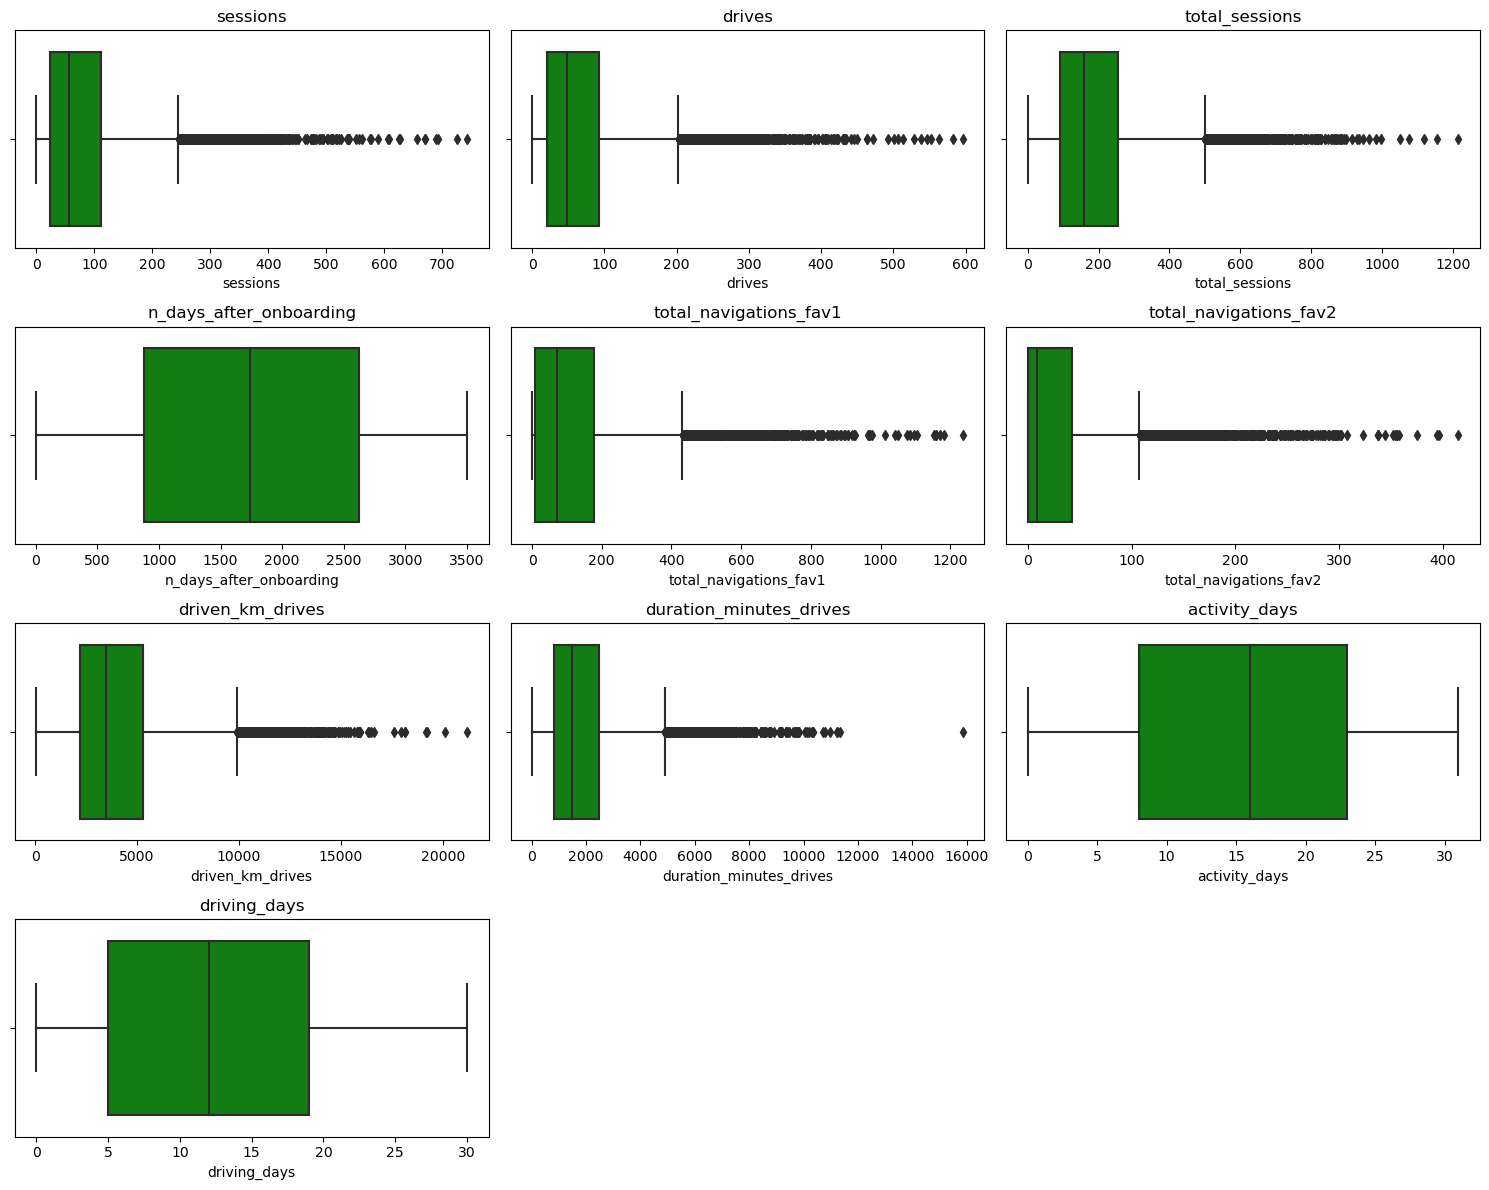

In [41]:
columns = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 
           'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
           'duration_minutes_drives', 'activity_days', 'driving_days']

num_rows = 4
num_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=data, x=col, color='#028E00', ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

# Hide any remaining empty subplots
for i in range(len(columns), num_rows * num_cols):
    axes[i].axis('off')

# Adjust the layout
plt.tight_layout()

plt.show()


# EDA and feature engineering

In [42]:
col_drop=[]

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_11360/935332023.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cor.corr(method='pearson'),annot=True,cmap='Reds')


<Axes: >

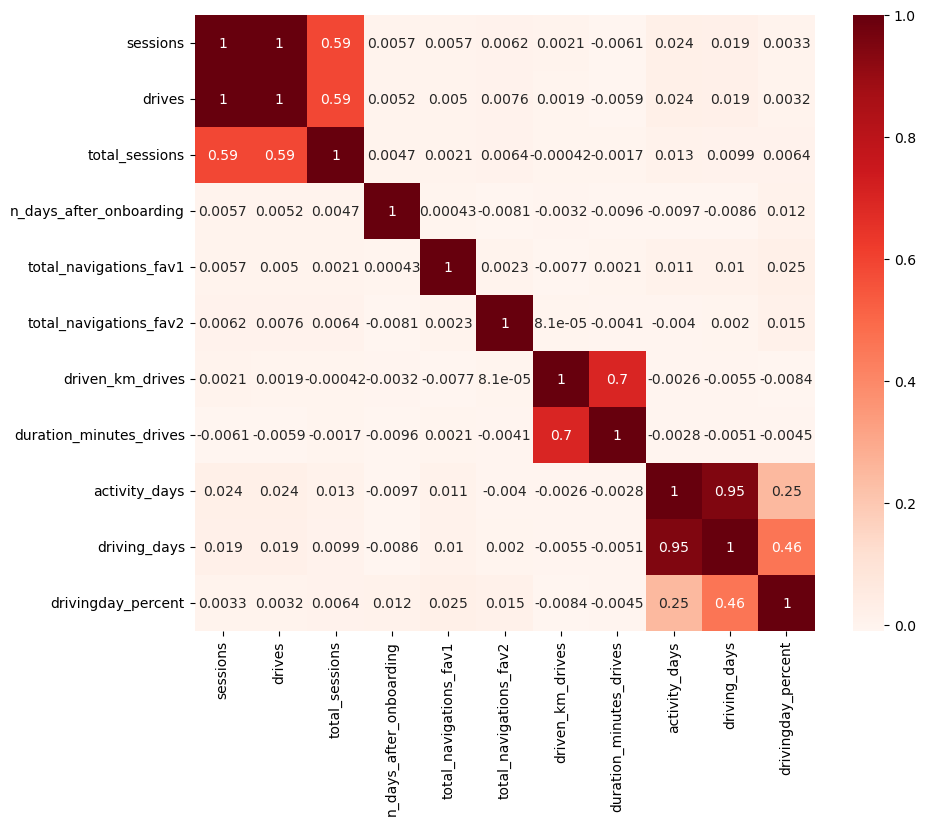

In [60]:
data_cor = data.drop(columns='churned',axis =1)

plt.figure(figsize=(10,8))
sns.heatmap(data_cor.corr(method='pearson'),annot=True,cmap='Reds')
#plt.title('Correlation heatmap', fontsize=14)

#### From the correlation heatmap, we can see many pairs of columns are highly correlated, we need to get futher analysis to drop some of the columns that are less representative. 
#### sessions and drives; activity_days, driving_days, and drivingday_percent; driven_km_drives and duration_minutes_drives

In [64]:
def churnratio(data,feature):
    '''
    This function is to calculate the ratio of charged off.
    Input:
    data: dataframe
    feature: a column in data
    Output:
    percent: charged_off/(charged_off + (fully_paid+current))
    '''
    percent = data.groupby(feature)['churned'].mean()
    return percent

In [118]:
def group(var, bins):
    '''
    This function is to group continuous variables by quantiles.
    Input:
    var: the continuous variable need be group
    bins: the number of group
    Output:
    An array-like object representing the respective bin for each value of var
    '''
    group = pd.qcut(data[var],bins,duplicates='drop')
    return group

the relation between churned and sessions: 0.03692276227143965
the relation between churned and drives: 0.03729578215130672
the relation between churned ans total_sessions 0.022914809617694556


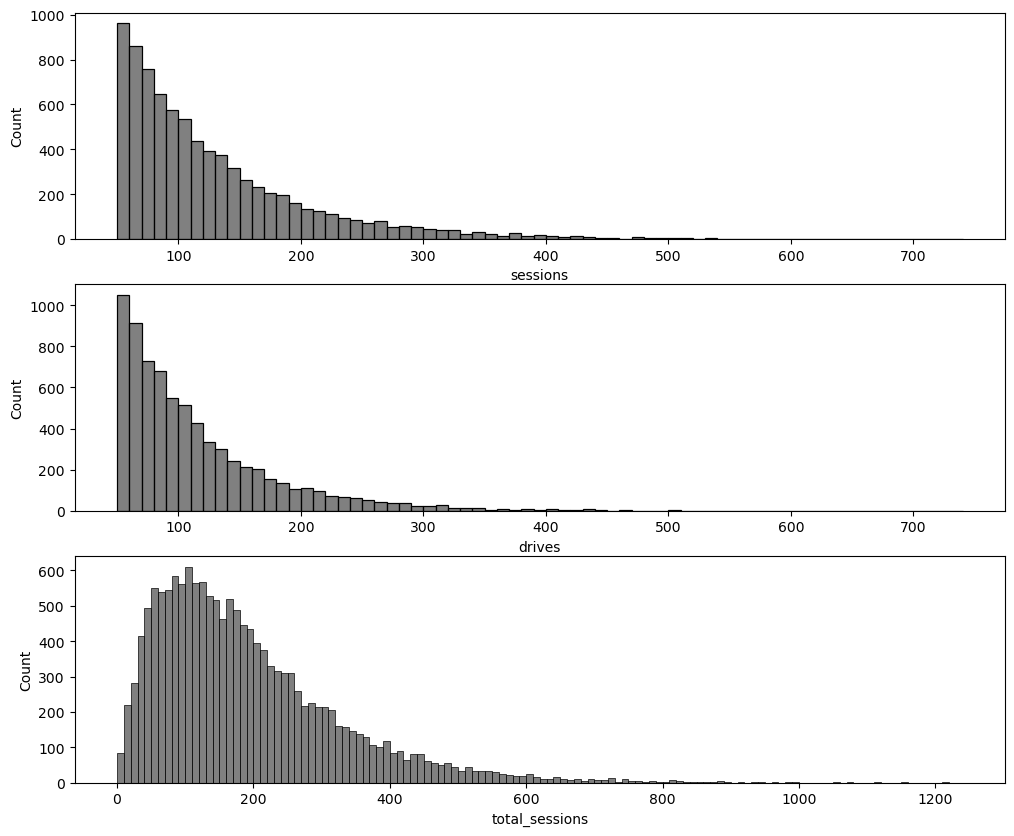

In [99]:
#sessions and drives
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.histplot(data=data, x=data['sessions'],color="#555555", bins = np.arange(50,750,10))
#plt.title('the distribution for sessions')
plt.subplot(3,1,2)
sns.histplot(data= data, x=data['drives'], color="#555555", bins = np.arange(50,750,10))
#plt.title('the distribution for drives')
plt.subplot(3,1,3)
sns.histplot(data= data, x=data['total_sessions'], color="#555555", bins = np.arange(0,1250,10))

print('the relation between churned and sessions:',data['sessions'].corr(data['churned']))
print('the relation between churned and drives:',data['drives'].corr(data['churned']))
print('the relation between churned ans total_sessions', data['total_sessions'].corr(data['churned']))

#### From the histogram above,  we can see the two variable have the same pattern. and as the correlation scores show drives has higher score, I will drop sessions

In [54]:
col_drop.append('sessions')
print(len(col_drop))

1


In [100]:
col_drop.append('total_sessions')
len(col_drop)

5

the relation between churned and activity_days: -0.295190194575218
the relation between churned and driving_days: -0.2860802335364113
the relation between churned and drivingday_percent: -0.10120322402610935


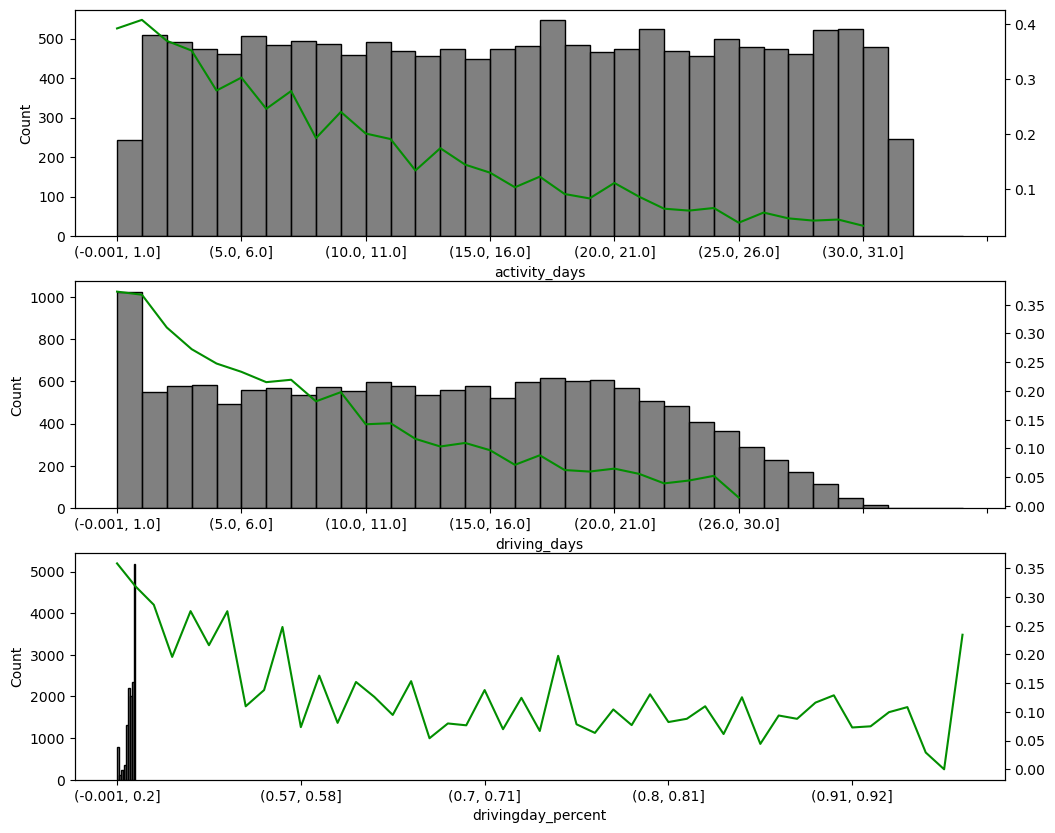

In [121]:
#activity_days, driving_days, and drivingday_percent
# Histogram
# plt.figure(figsize=(12,4))
# label=['driving days', 'activity days']
# plt.hist([df['driving_days'], df['activity_days']],
#          bins=range(0,33),
#          label=label)
# plt.xlabel('days')
# plt.ylabel('count')
# plt.legend()
# plt.title('driving_days vs. activity_days');
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.histplot(data['activity_days'], color='#555555', bins=np.arange(0,35,1))
plt.twinx()
churnratio(data,group('activity_days', 35)).plot(kind='line',color='#028E00')


plt.subplot(3,1,2)
sns.histplot(data['driving_days'], color='#555555', bins=np.arange(0,35,1))
plt.twinx()
churnratio(data,group('driving_days', 35)).plot(kind='line',color='#028E00')


plt.subplot(3,1,3)
sns.histplot(data['drivingday_percent'],color ='#555555', bins=np.arange(0,1.01,0.1))
plt.twinx()
churnratio(data,group('drivingday_percent', 100)).plot(kind='line',color='#028E00')

print('the relation between churned and activity_days:', data['activity_days'].corr(data['churned']))
print('the relation between churned and driving_days:', data['driving_days'].corr(data['churned']))
print('the relation between churned and drivingday_percent:', data['drivingday_percent'].corr(data['churned']))

#### I see from the relation score that activity_days has the highest score.

In [93]:
col_drop.append('driving_days')
col_drop.append('drivingday_percent')
len(col_drop)

4

In [96]:
del col_drop[1]
col_drop

['sessions', 'driving_days', 'drivingday_percent']

the relation between churned and driven_km_drives: 0.019440524707274684
the relation between churned and duration_minutes_drives: 0.035697843428917395


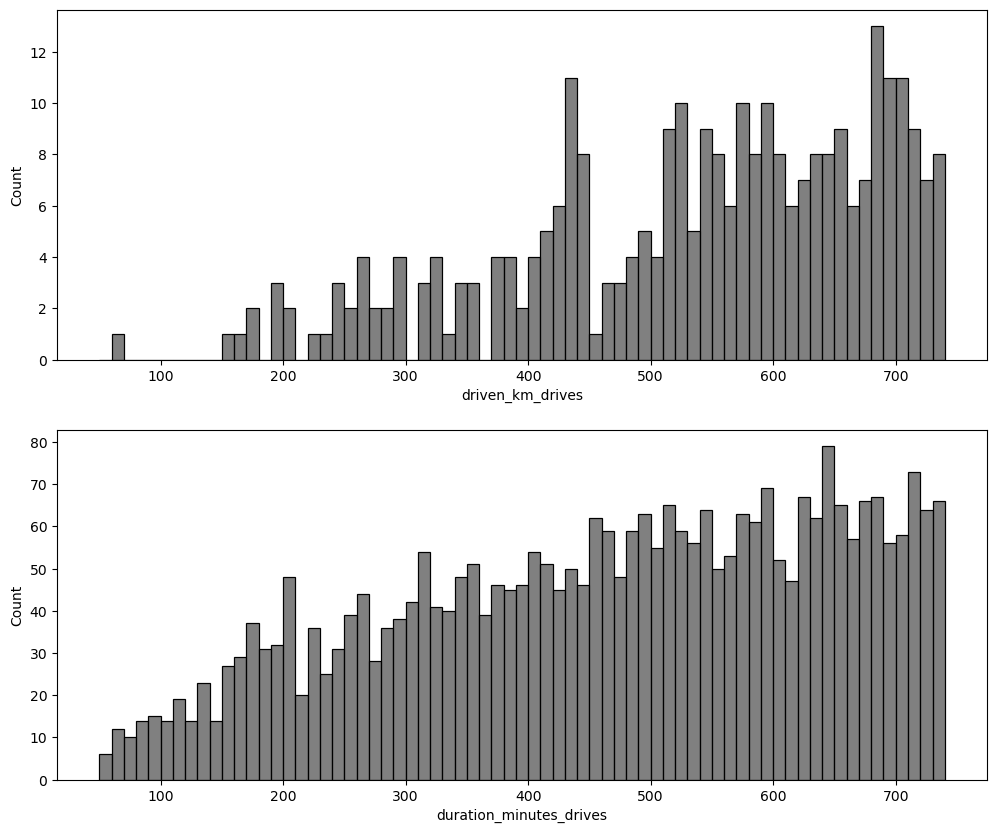

In [97]:
#driven_km_drives and duration_minutes_drives   0，30000，500
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.histplot(data=data, x=data['driven_km_drives'],color="#555555", bins = np.arange(50,750,10))
#plt.title('the distribution for sessions')
plt.subplot(2,1,2)
sns.histplot(data= data, x=data['duration_minutes_drives'], color="#555555", bins = np.arange(50,750,10))
#plt.title('the distribution for drives')

print('the relation between churned and driven_km_drives:',data['driven_km_drives'].corr(data['churned']))
print('the relation between churned and duration_minutes_drives:',data['duration_minutes_drives'].corr(data['churned']))

In [98]:
col_drop.append('driven_km_drives')
len(col_drop)

4

In [103]:
data2= data.drop(columns=col_drop, axis =1)
print(data2.shape)
data2.head()

(14999, 8)


,drives,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,duration_minutes_drives,activity_days,device,churned
0,226,2276,208,0,1985.775061,28,Android,0
1,107,1225,19,64,3160.472914,13,iPhone,0
2,95,2651,0,0,1610.735904,14,Android,0
3,40,15,322,7,587.196542,7,iPhone,0
4,68,1562,166,5,1219.555924,27,Android,0


/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_11360/1479890870.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cor.corr(method='pearson'), annot=True, cmap='Reds')


<Axes: >

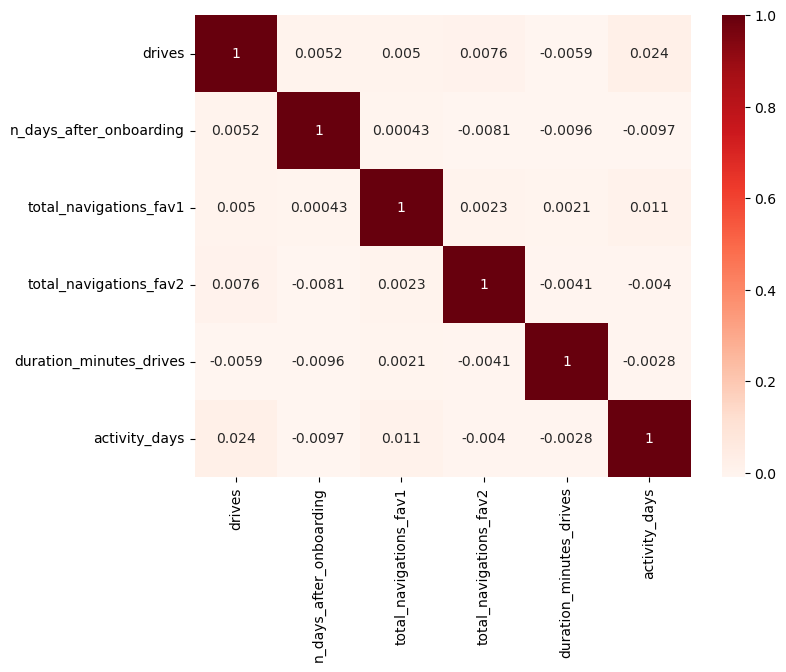

In [105]:
data_cor = data2.drop('churned',axis=1)

plt.figure(figsize=(8,6))
sns.heatmap(data_cor.corr(method='pearson'), annot=True, cmap='Reds')

#### Ok, now there is no multicolineararity, we can go on to do EDA

In [106]:
data2.columns

Index(['drives', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'duration_minutes_drives', 'activity_days', 'device', 'churned'], dtype='object')

In [108]:
color =('#555555','#028E00')

<Axes: xlabel='device'>

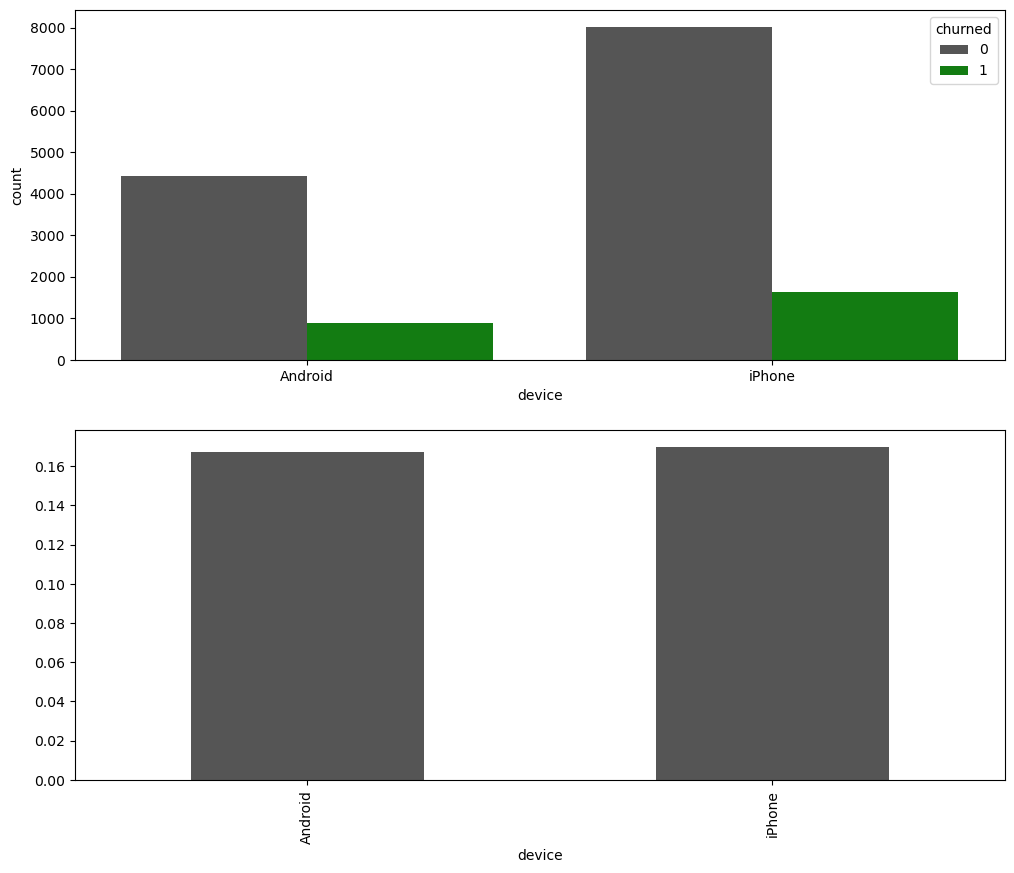

In [112]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x='device', hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,'device').plot(kind='bar', color='#555555')

#### The churn rate between two devices almost the same, this variable not so important.

<Axes: xlabel='drives'>

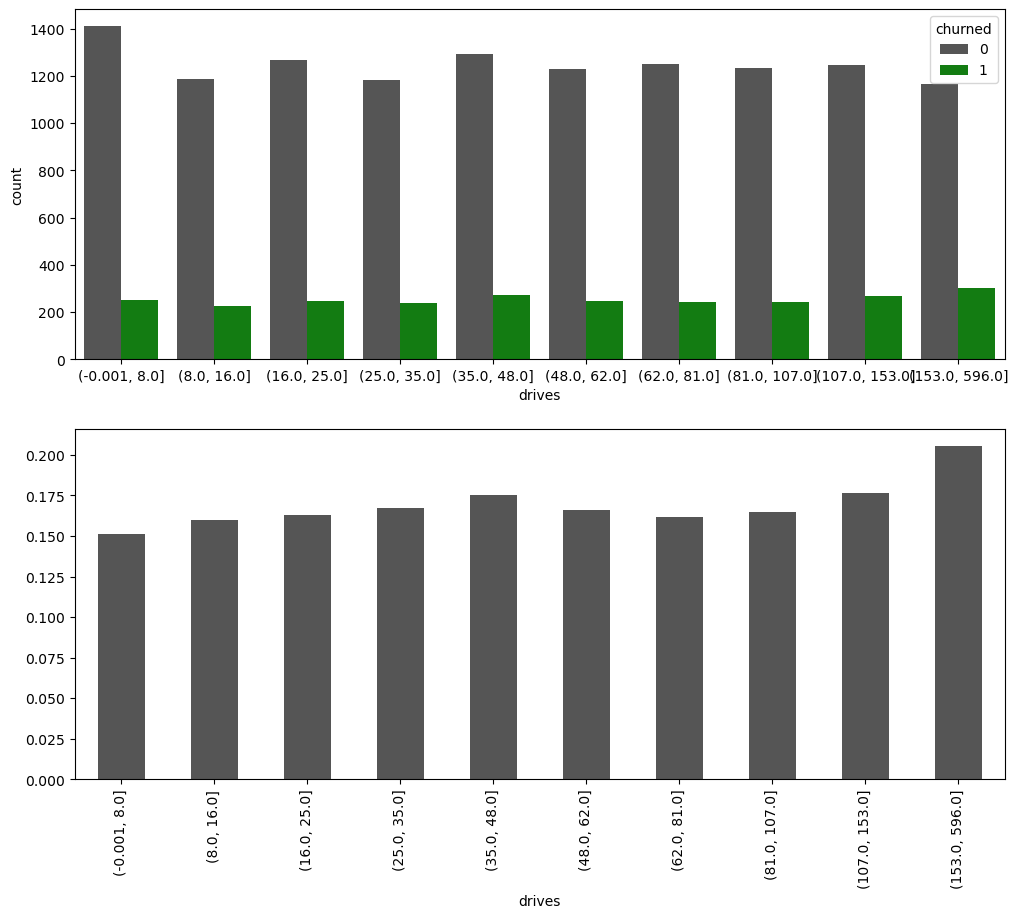

In [114]:
# drives 
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('drives',10), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('drives',10)).plot(kind='bar', color='#555555')

#### As the occurance of drives increases, the churn rate has slightly increased, the largest drives has the highest ratio

<Axes: xlabel='n_days_after_onboarding'>

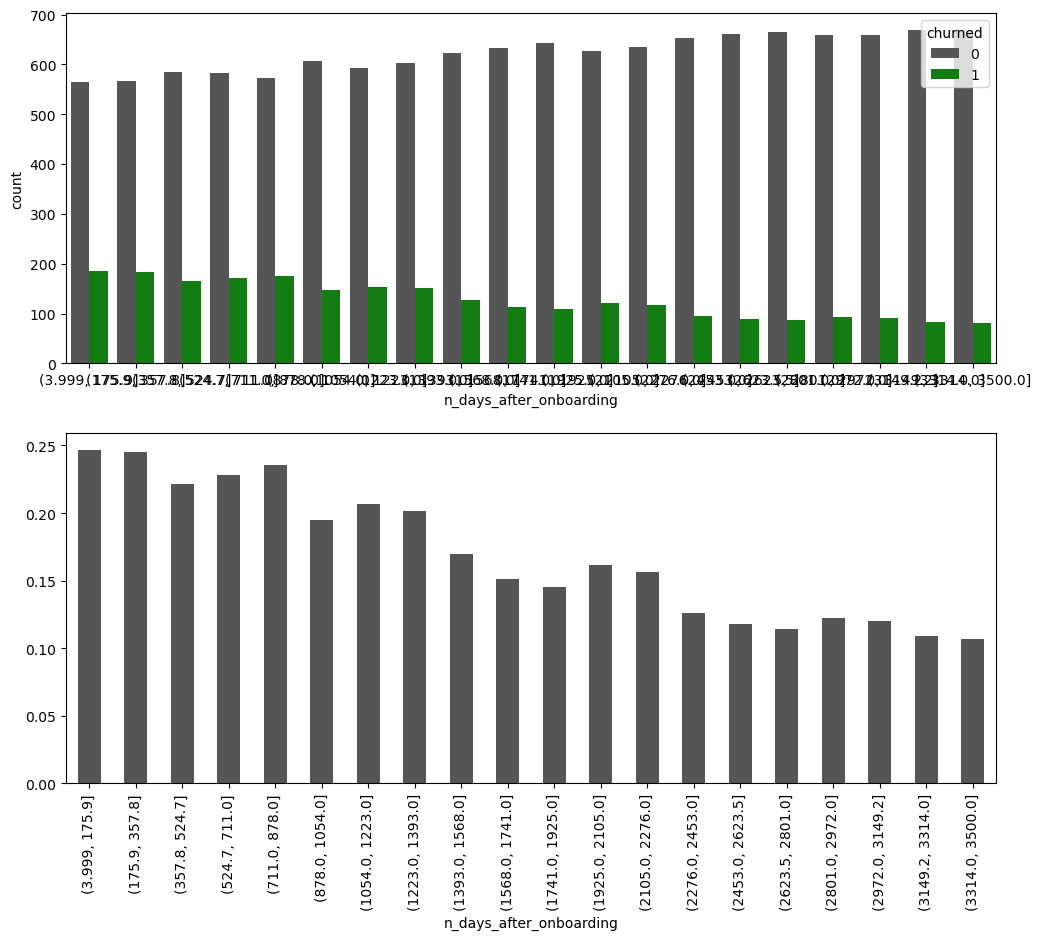

In [115]:
#'n_days_after_onboarding'
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('n_days_after_onboarding',20), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('n_days_after_onboarding',20)).plot(kind='bar', color='#555555')

#### This phenomenon is very obvious that as the onboarding days goes up, the churn rate goes down. The new users are more likely to churn 

<Axes: xlabel='total_navigations_fav1'>

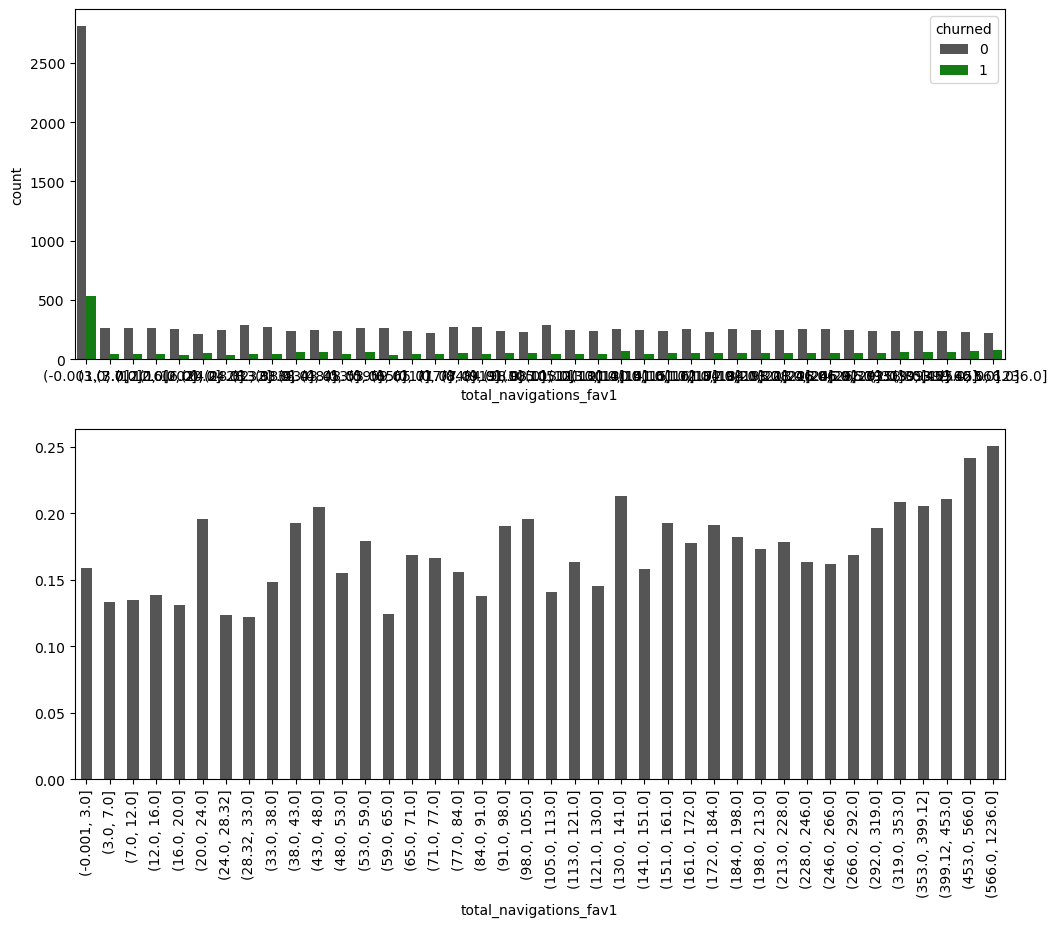

In [122]:
#total_navigations_fav1
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('total_navigations_fav1',50), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('total_navigations_fav1',50)).plot(kind='bar', color='#555555')

<Axes: xlabel='total_navigations_fav2'>

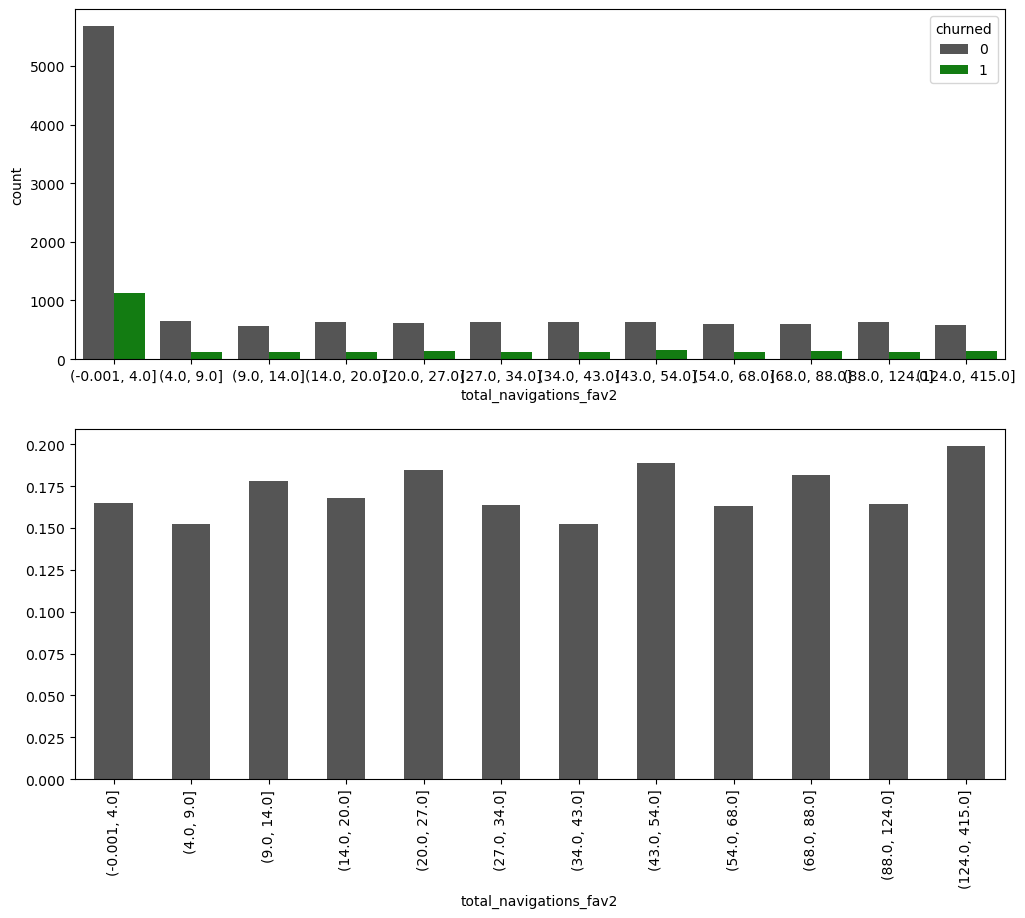

In [123]:
#total_navigations_fav2
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('total_navigations_fav2',20), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('total_navigations_fav2',20)).plot(kind='bar', color='#555555')

#### The part having biggest number has the highest churnrate

<Axes: xlabel='duration_minutes_drives'>

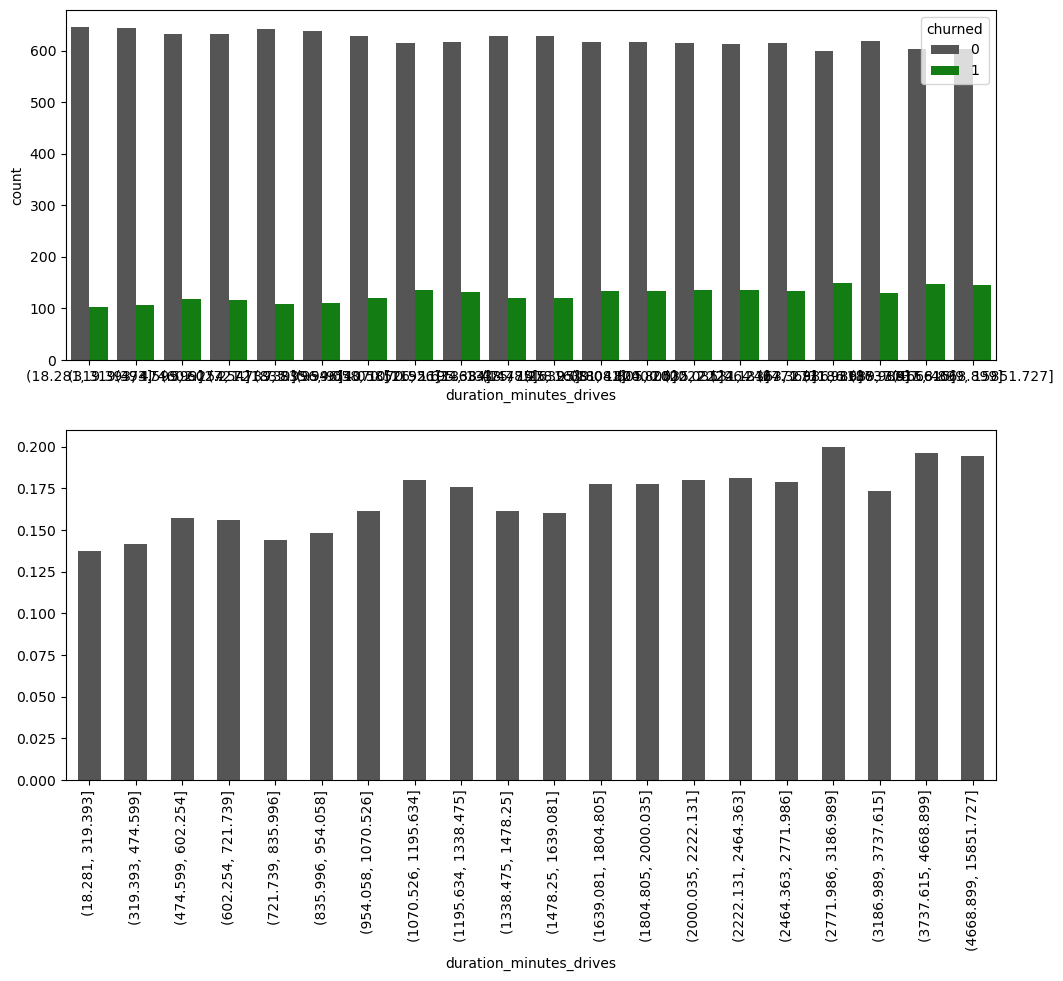

In [124]:
#'duration_minutes_drives'
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('duration_minutes_drives',20), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('duration_minutes_drives',20)).plot(kind='bar', color='#555555')

#### As the driving duration minutes go up, the churn rate goes up too. people will use the product when they are driving, so this plots may indicate that the using expeirence of this product need more UX improvement.

<Axes: xlabel='activity_days'>

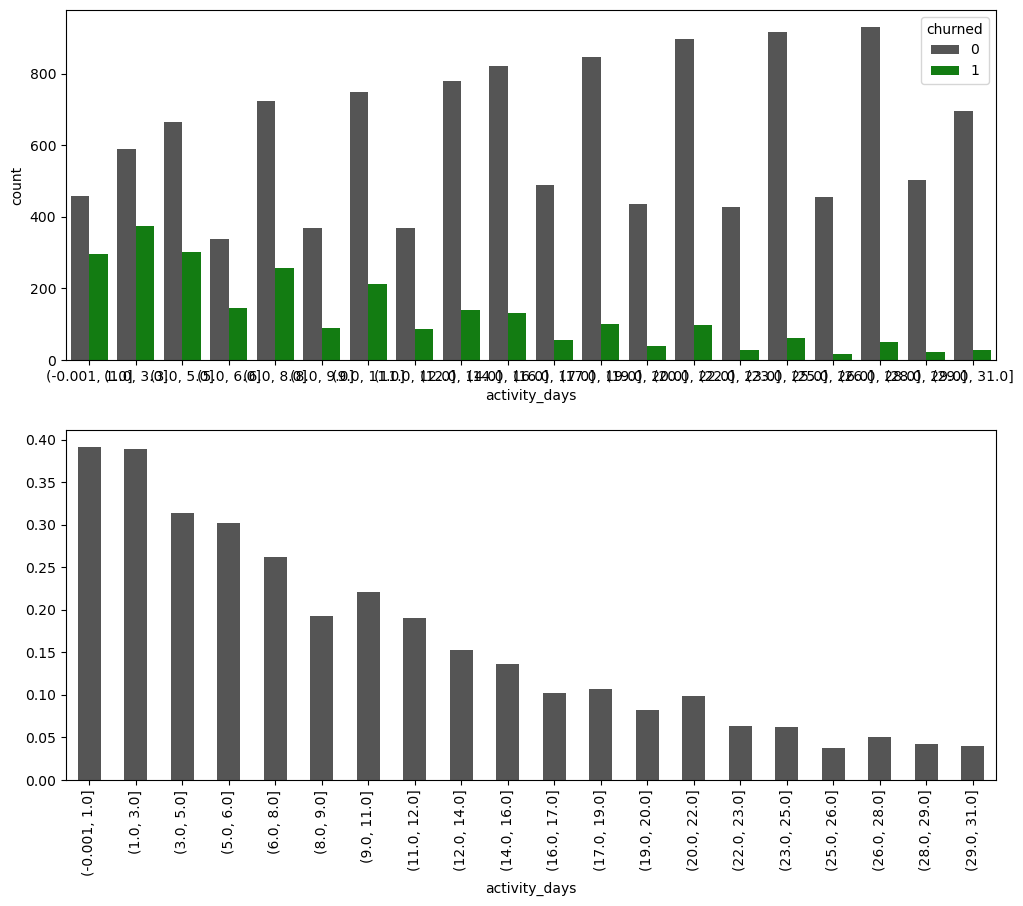

In [125]:
#activity_days
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('activity_days',20), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('activity_days',20)).plot(kind='bar', color='#555555')

####  people who active frequently are less likey to churn. So active users are the best to retain and to reach out to build royalty.

In [127]:
data.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,churned,drivingday_percent
0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0,0.68
1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,0,0.85
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0,0.57
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0,0.43
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0,0.67


In [128]:
data2.head()

,drives,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,duration_minutes_drives,activity_days,device,churned
0,226,2276,208,0,1985.775061,28,Android,0
1,107,1225,19,64,3160.472914,13,iPhone,0
2,95,2651,0,0,1610.735904,14,Android,0
3,40,15,322,7,587.196542,7,iPhone,0
4,68,1562,166,5,1219.555924,27,Android,0


In [129]:
data2=pd.concat((data2,data['drivingday_percent']), axis=1)
data2.shape

(14999, 9)

<Axes: xlabel='drivingday_percent'>

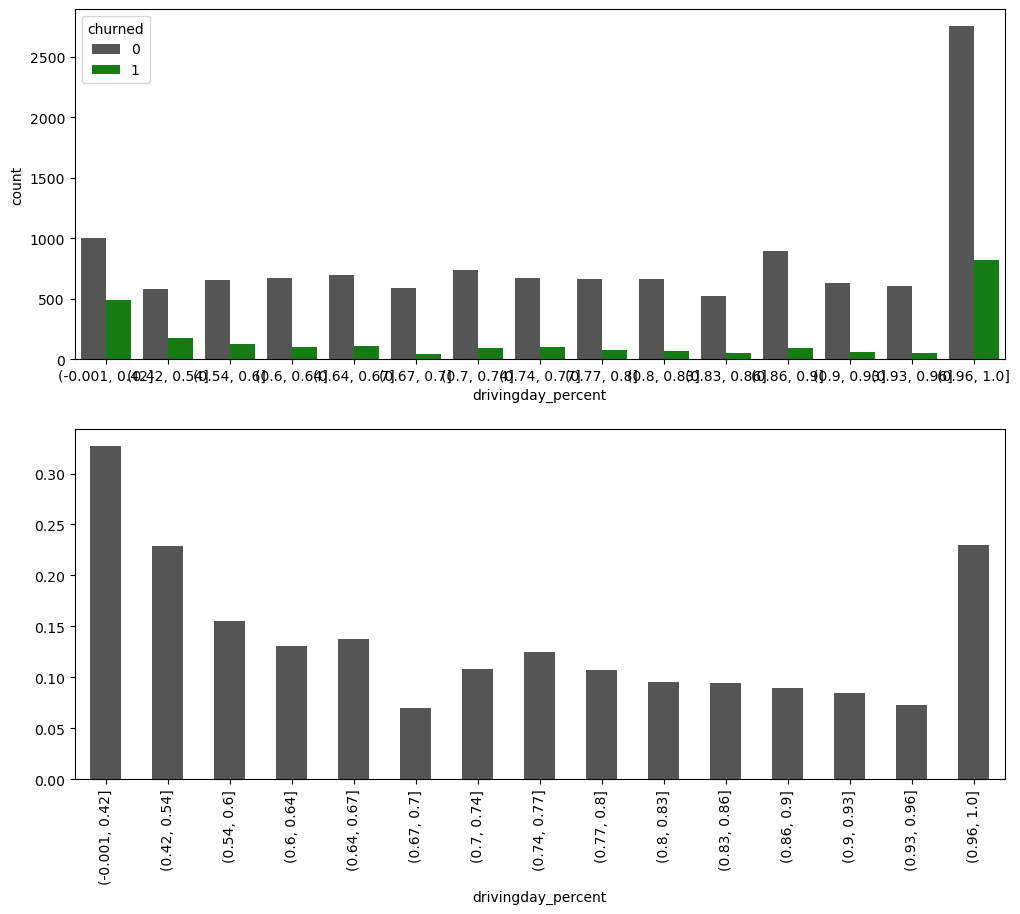

In [131]:
#driving_percent
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=data2,x=group('drivingday_percent',20), hue='churned',palette=color)
plt.subplot(2,1,2)
churnratio(data2,group('drivingday_percent',20)).plot(kind='bar', color='#555555')

#### It seems that we can really drop drivingday_percent this column off, because there really isn't any stable pattern and as I have aculated its correlation with the target variable, the rate is low, nothing else need to worry.

In [132]:
data2 = data2.drop(columns='drivingday_percent', axis=1)

## Featuring engineering

In [136]:
#check for the missing values 
data2.isna().mean()

drives                     0.0
n_days_after_onboarding    0.0
total_navigations_fav1     0.0
total_navigations_fav2     0.0
duration_minutes_drives    0.0
activity_days              0.0
device                     0.0
churned                    0.0
dtype: float64

In [137]:
#remove duplicates
print("Before removing duplicates, the dataset's shape:", data2.shape)
data3= data2.drop_duplicates()
print("After removing duplicates, the dataset's shape:", data3.shape)

Before removing duplicates, the dataset's shape: (14999, 8)
After removing duplicates, the dataset's shape: (14999, 8)


In [138]:
#remove outliers 
def remove_outliers(df,col):
    mean = data[col].mean()
    std = data[col].std()
    
    return df[np.abs(df[col]-mean) <= (3*std)]

In [142]:
columns_sel = [col for col in data2.columns if data2[col].dtype in ['int64','float64']]
#numeric_columns=data3.select_dtypes(include=['float64','int64'])

for col in columns_sel:
    remove_outliers(data2,col)
    print('After removing the outliers of {}, the remaining data has:{}'.format(col,data2.shape[0]))

After removing the outliers of drives, the remaining data has:14999
After removing the outliers of n_days_after_onboarding, the remaining data has:14999
After removing the outliers of total_navigations_fav1, the remaining data has:14999
After removing the outliers of total_navigations_fav2, the remaining data has:14999
After removing the outliers of duration_minutes_drives, the remaining data has:14999
After removing the outliers of activity_days, the remaining data has:14999
After removing the outliers of churned, the remaining data has:14999


# I have done the EDA and Feature engineering, next I will build the models to see the feature importance and the model accuaracy.

In [143]:
data2.to_csv('Waze cleaned data', index = False)

In [144]:
# more code examples 
# multiple ='fill'  VS multiple = 'dodge'

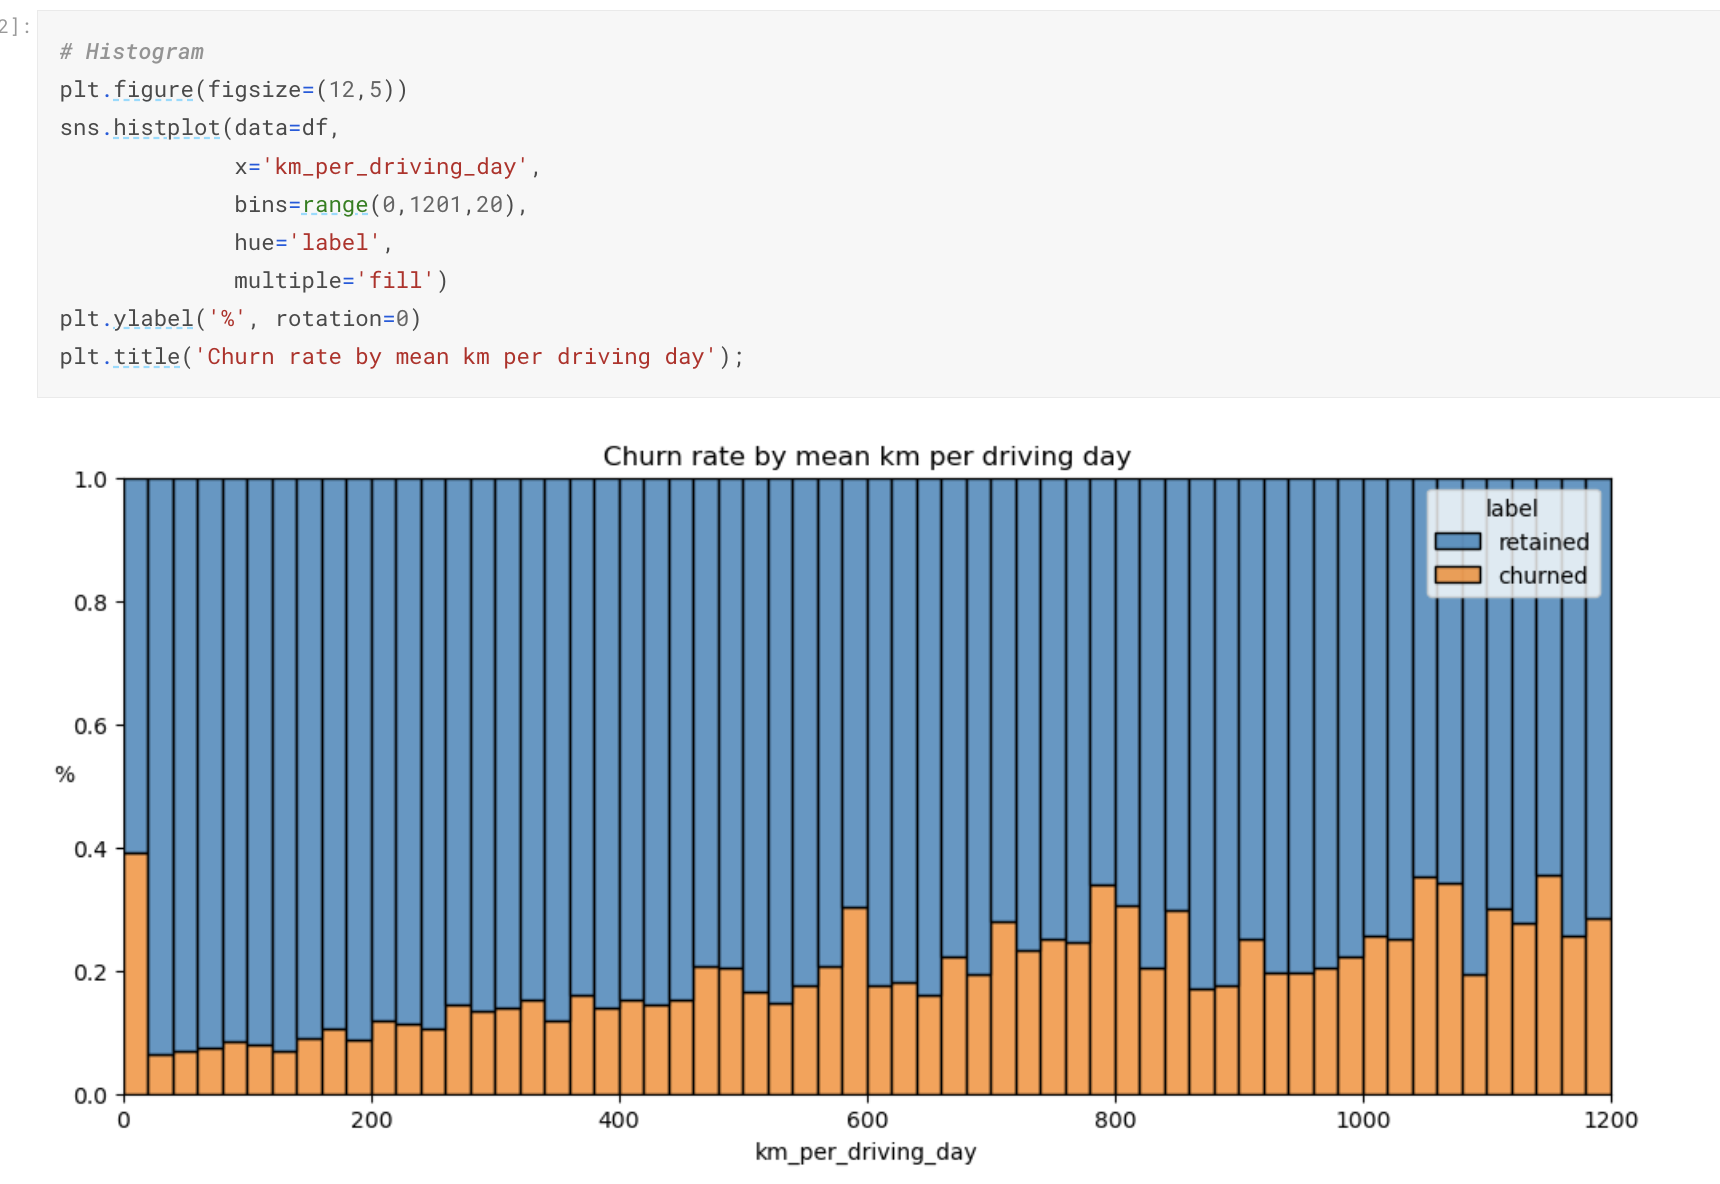

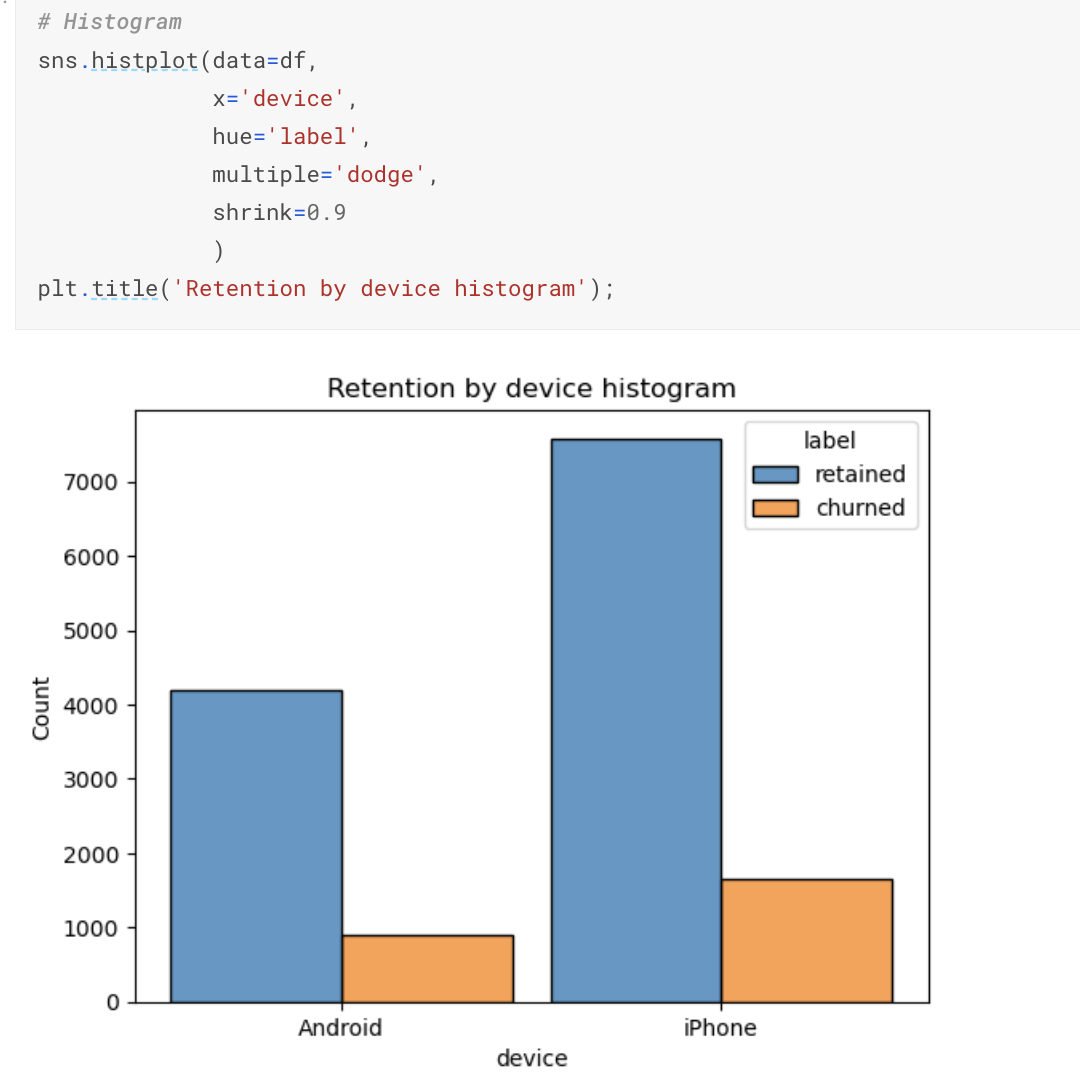